In [163]:
#install pyodbc and python-dotenv

%pip install pyodbc
%pip install python-dotenv
%pip install lightgbm
%pip install statsmodels
%pip install missingno



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [164]:
# import all necessary packages

import pyodbc
from dotenv import dotenv_values
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as ndates
import math


from dotenv import dotenv_values
import pyodbc
import os
import numpy as np



import warnings
warnings.filterwarnings('ignore')

In [165]:
df_stores = pd.read_csv('C:/Users/USER/Desktop/LP3 Regression Analysis Project Shared Folder/stores.csv')
df_holidays_events = pd.read_csv('C:/Users/USER/Desktop/LP3 Regression Analysis Project Shared Folder/holiday_events.csv')
df_transactions = pd.read_csv('C:/Users/USER/Desktop/LP3 Regression Analysis Project Shared Folder/transactions.csv')
df_oil = pd.read_csv('C:/Users/USER/Desktop/LP3 Regression Analysis Project Shared Folder/oil.csv')

# EXPLORATORY DATA ANALYSIS

In [166]:
df_oil.head()

,Unnamed: 0,date,dcoilwtico
0,0,2013-01-01,NaN
1,1,2013-01-02,93.139999
2,2,2013-01-03,92.970001
3,3,2013-01-04,93.120003
4,4,2013-01-07,93.199997


In [167]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1218 non-null   int64  
 1   date        1218 non-null   object 
 2   dcoilwtico  1175 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 28.7+ KB


In [168]:
df_oil['date'] = pd.to_datetime(df_oil['date'])
print(df_oil['date'].dtype)

datetime64[ns]


In [169]:
df_holidays_events.head()

,Unnamed: 0,date,type,locale,locale_name,description,transferred
0,0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [170]:
df_holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   350 non-null    int64 
 1   date         350 non-null    object
 2   type         350 non-null    object
 3   locale       350 non-null    object
 4   locale_name  350 non-null    object
 5   description  350 non-null    object
 6   transferred  350 non-null    bool  
dtypes: bool(1), int64(1), object(5)
memory usage: 16.9+ KB


In [171]:
df_holidays_events['date'] = pd.to_datetime(df_holidays_events['date'])
print(df_holidays_events['date'].dtype)

datetime64[ns]


In [172]:
df_holidays_events.rename(columns={"type" : "hol_type"}, inplace= True)
df_holidays_events.head()

,Unnamed: 0,date,hol_type,locale,locale_name,description,transferred
0,0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [173]:
unique_hol = df_holidays_events['description'].unique()
unique_hol

array(['Fundacion de Manta', 'Provincializacion de Cotopaxi',
       'Fundacion de Cuenca', 'Cantonizacion de Libertad',
       'Cantonizacion de Riobamba', 'Cantonizacion del Puyo',
       'Cantonizacion de Guaranda', 'Provincializacion de Imbabura',
       'Cantonizacion de Latacunga', 'Fundacion de Machala',
       'Fundacion de Santo Domingo', 'Cantonizacion de El Carmen',
       'Cantonizacion de Cayambe', 'Fundacion de Esmeraldas',
       'Primer Grito de Independencia', 'Fundacion de Riobamba',
       'Fundacion de Ambato', 'Fundacion de Ibarra',
       'Cantonizacion de Quevedo', 'Independencia de Guayaquil',
       'Traslado Independencia de Guayaquil', 'Dia de Difuntos',
       'Independencia de Cuenca', 'Provincializacion de Santo Domingo',
       'Provincializacion Santa Elena', 'Independencia de Guaranda',
       'Independencia de Latacunga', 'Independencia de Ambato',
       'Fundacion de Quito-1', 'Fundacion de Quito', 'Fundacion de Loja',
       'Navidad-4', 'Cantonizac

In [174]:
loc_hol = df_holidays_events[df_holidays_events['locale'] == "Local"]
print(loc_hol['description'].nunique())

if (df_holidays_events['locale'] == "Local").any():
    print((df_holidays_events['locale'] == "Local").sum())

for a in unique_hol:
    if a in loc_hol['description'].values:
        print(a)

27
152
Fundacion de Manta
Fundacion de Cuenca
Cantonizacion de Libertad
Cantonizacion de Riobamba
Cantonizacion del Puyo
Cantonizacion de Guaranda
Cantonizacion de Latacunga
Fundacion de Machala
Fundacion de Santo Domingo
Cantonizacion de El Carmen
Cantonizacion de Cayambe
Fundacion de Esmeraldas
Fundacion de Riobamba
Fundacion de Ambato
Fundacion de Ibarra
Cantonizacion de Quevedo
Independencia de Guaranda
Independencia de Latacunga
Independencia de Ambato
Fundacion de Quito-1
Fundacion de Quito
Fundacion de Loja
Cantonizacion de Salinas
Fundacion de Guayaquil-1
Fundacion de Guayaquil
Traslado Fundacion de Guayaquil
Traslado Fundacion de Quito


In [175]:
nat_hol = df_holidays_events[df_holidays_events['locale'] == "National"]
print(nat_hol['description'].nunique())

if (df_holidays_events['locale'] == "National").any():
    print((df_holidays_events['locale'] == "National").sum())

for a in unique_hol:
    if a in nat_hol['description'].values:
        print(a)


72
174
Primer Grito de Independencia
Independencia de Guayaquil
Traslado Independencia de Guayaquil
Dia de Difuntos
Independencia de Cuenca
Navidad-4
Navidad-3
Navidad-2
Puente Navidad
Navidad-1
Navidad
Navidad+1
Puente Primer dia del ano
Primer dia del ano-1
Primer dia del ano
Recupero puente Navidad
Recupero puente primer dia del ano
Carnaval
Viernes Santo
Dia del Trabajo
Dia de la Madre-1
Dia de la Madre
Batalla de Pichincha
Inauguracion Mundial de futbol Brasil
Mundial de futbol Brasil: Ecuador-Suiza
Mundial de futbol Brasil: Ecuador-Honduras
Mundial de futbol Brasil: Ecuador-Francia
Mundial de futbol Brasil: Octavos de Final
Mundial de futbol Brasil: Cuartos de Final
Mundial de futbol Brasil: Semifinales
Mundial de futbol Brasil: Tercer y cuarto lugar
Mundial de futbol Brasil: Final
Black Friday
Cyber Monday
Recupero Puente Navidad
Recupero Puente Primer dia del ano
Terremoto Manabi
Terremoto Manabi+1
Terremoto Manabi+2
Terremoto Manabi+3
Terremoto Manabi+4
Terremoto Manabi+5
Terr

In [176]:
reg_hol = df_holidays_events[df_holidays_events['locale'] == "Regional"]

if (df_holidays_events['locale'] == "Regional").any():
    print((df_holidays_events['locale'] == "Regional").sum())

for a in unique_hol:
    if a in reg_hol['description'].values:
        print(a)


24
Provincializacion de Cotopaxi
Provincializacion de Imbabura
Provincializacion de Santo Domingo
Provincializacion Santa Elena


In [177]:
unique_hol = df_holidays_events['description'].nunique()
unique_hol

103

103 unique holidays with them being classified as either national regional and local based on the date it occured on

In [178]:
df_stores.head()

,Unnamed: 0,store_nbr,city,state,type,cluster
0,0,1,Quito,Pichincha,D,13
1,1,2,Quito,Pichincha,D,13
2,2,3,Quito,Pichincha,D,8
3,3,4,Quito,Pichincha,D,9
4,4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [179]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  54 non-null     int64 
 1   store_nbr   54 non-null     int64 
 2   city        54 non-null     object
 3   state       54 non-null     object
 4   type        54 non-null     object
 5   cluster     54 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 2.7+ KB


In [180]:
df_stores.rename(columns={"type" : "store_type"}, inplace= True)
df_stores

,Unnamed: 0,store_nbr,city,state,store_type,cluster
0,0,1,Quito,Pichincha,D,13
1,1,2,Quito,Pichincha,D,13
2,2,3,Quito,Pichincha,D,8
3,3,4,Quito,Pichincha,D,9
4,4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,5,6,Quito,Pichincha,D,13
6,6,7,Quito,Pichincha,D,8
7,7,8,Quito,Pichincha,D,8
8,8,9,Quito,Pichincha,B,6
9,9,10,Quito,Pichincha,C,15


In [181]:
no_cities = df_stores['city'].nunique()
print("The brand is only present in ", no_cities, " cities.")
print()
no_state = df_stores['state'].nunique()
print("The brand is present in just ", no_state ," states across the country")
print()
no_cluster = df_stores['cluster'].sum()
print("There's a total of ", no_cluster," shops across the country")

The brand is only present in  22  cities.

The brand is present in just  16  states across the country

There's a total of  458  shops across the country


In [182]:
df_transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [183]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [184]:
df_transactions['date'] = pd.to_datetime(df_transactions['date'])
print(df_transactions['date'].dtype)

datetime64[ns]


In [185]:
df_stores = df_stores.drop(columns=['Unnamed: 0'])
df_holidays_events = df_holidays_events.drop(columns=['Unnamed: 0'])
df_oil = df_oil.drop(columns=['Unnamed: 0'])


In [186]:
df_train = pd.read_csv('C:/Users/USER/Downloads/train.csv')
df_train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [187]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [188]:
df_train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [189]:
df_train['date'] = pd.to_datetime(df_train['date'])
print(df_train['date'].dtype)

datetime64[ns]


In [190]:
df_test = pd.read_csv('C:/Users/USER/Desktop/LP3 Regression Analysis Project Shared Folder/test.csv')

In [191]:
nu_data1 = pd.merge(df_oil, df_holidays_events, on= 'date', how='outer')
nu_data2 = pd.merge(df_train, nu_data1, on='date', how='outer')

# Filter by date range
start_date = '2013-01-1'
end_date = '2017-08-15'

nu_data2 = nu_data2[(nu_data2['date'] >= start_date) & (nu_data2['date'] <= end_date)]


nu_data = pd.merge(nu_data2, df_stores, on=['store_nbr'], how='outer')
nu_data

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,hol_type,locale,locale_name,description,transferred,city,state,store_type,cluster
0,0.0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13.0
1,1.0,2013-01-01,1.0,BABY CARE,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13.0
2,2.0,2013-01-01,1.0,BEAUTY,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13.0
3,3.0,2013-01-01,1.0,BEVERAGES,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13.0
4,4.0,2013-01-01,1.0,BOOKS,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054347,3000887.0,2017-08-15,9.0,SEAFOOD,16.0,0.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6.0
3054348,NaN,2013-12-25,NaN,NaN,NaN,NaN,NaN,Holiday,National,Ecuador,Navidad,False,NaN,NaN,NaN,NaN
3054349,NaN,2014-12-25,NaN,NaN,NaN,NaN,NaN,Holiday,National,Ecuador,Navidad,False,NaN,NaN,NaN,NaN
3054350,NaN,2015-12-25,NaN,NaN,NaN,NaN,NaN,Holiday,National,Ecuador,Navidad,False,NaN,NaN,NaN,NaN


In [192]:
#nu_data = nu_data.set_index(['store_nbr', 'date', 'family'])
#nu_data

In [193]:
nu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054352 entries, 0 to 3054351
Data columns (total 16 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           float64       
 1   date         datetime64[ns]
 2   store_nbr    float64       
 3   family       object        
 4   sales        float64       
 5   onpromotion  float64       
 6   dcoilwtico   float64       
 7   hol_type     object        
 8   locale       object        
 9   locale_name  object        
 10  description  object        
 11  transferred  object        
 12  city         object        
 13  state        object        
 14  store_type   object        
 15  cluster      float64       
dtypes: datetime64[ns](1), float64(6), object(9)
memory usage: 372.8+ MB


In [194]:
nu_data.isnull().sum()

id                   4
date                 0
store_nbr            4
family               4
sales                4
onpromotion          4
dcoilwtico      955156
hol_type       2551824
locale         2551824
locale_name    2551824
description    2551824
transferred    2551824
city                 4
state                4
store_type           4
cluster              4
dtype: int64

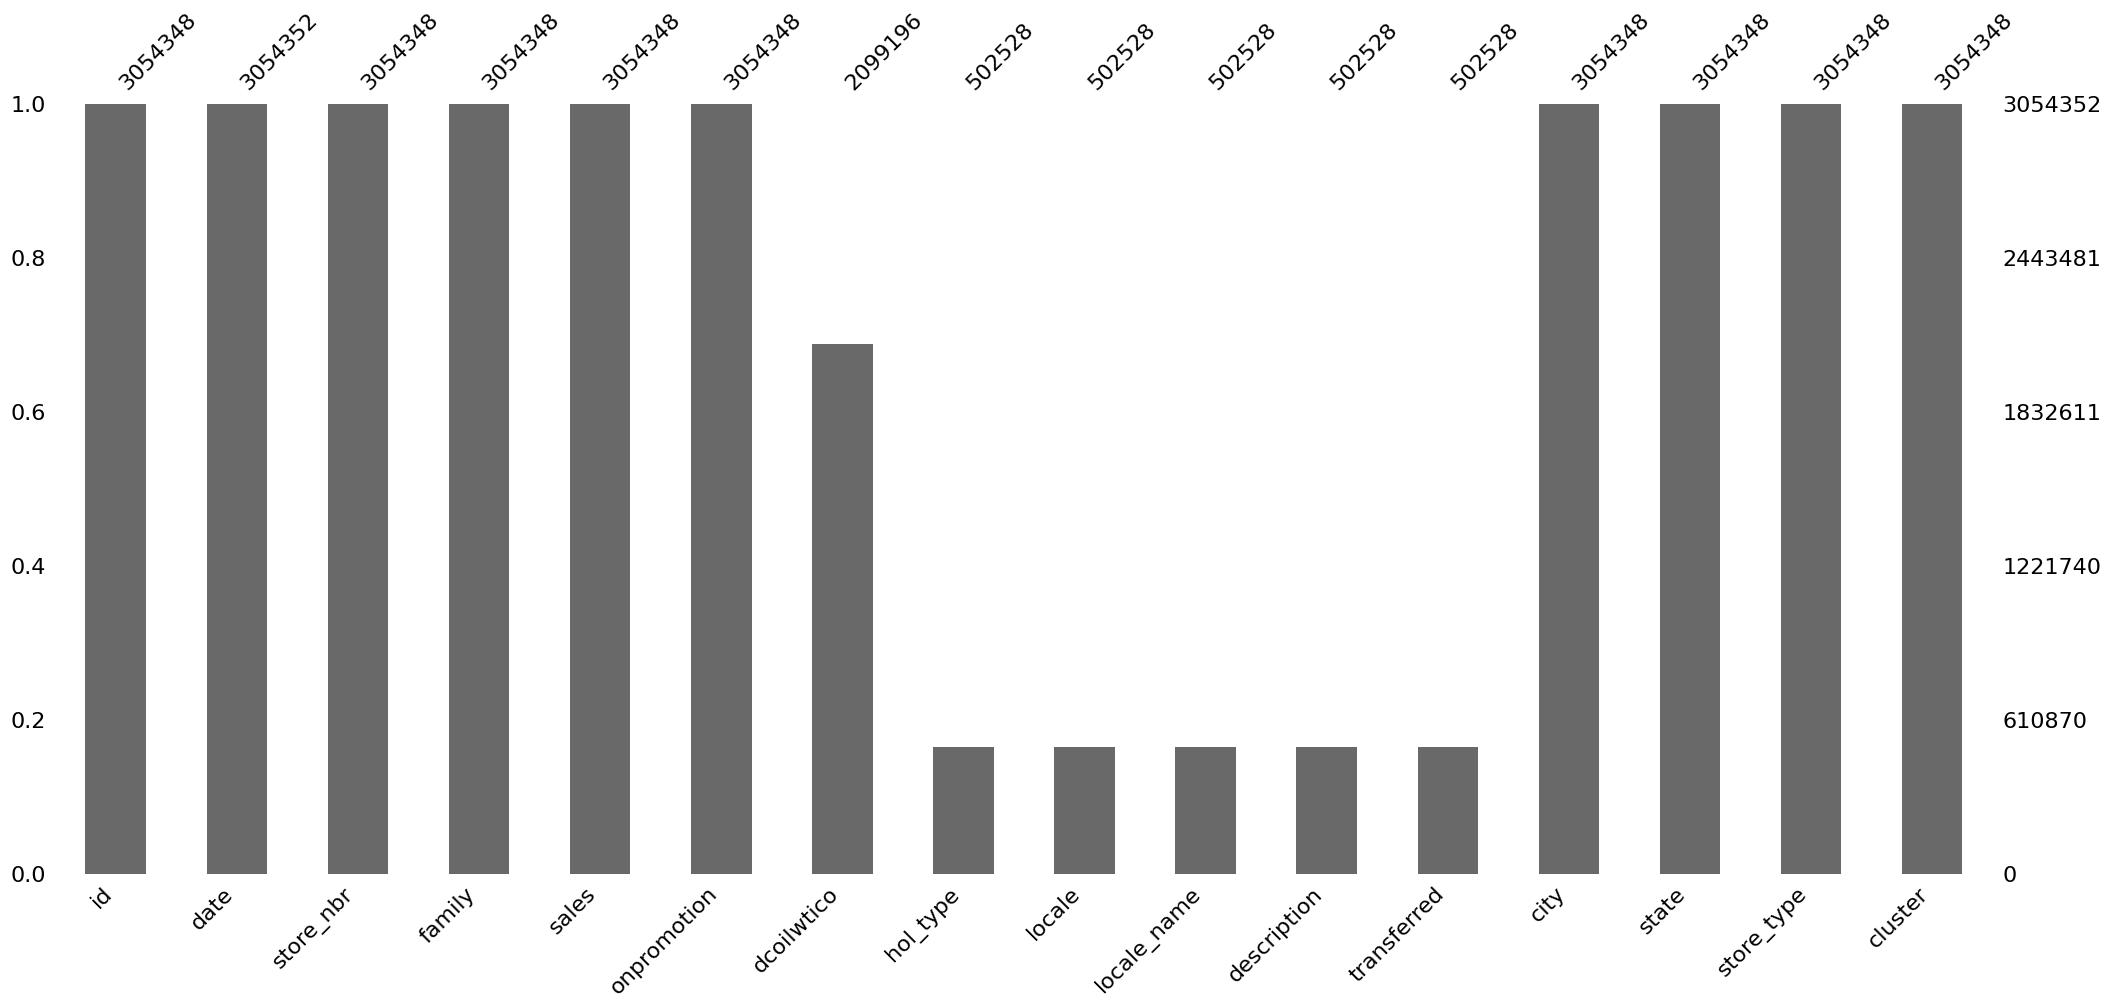

In [195]:
import missingno as msno
msno.bar(nu_data)
plt.show()


In [196]:
# Drop the last four rows
nu_data = nu_data.iloc[:-4]
nu_data

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,hol_type,locale,locale_name,description,transferred,city,state,store_type,cluster
0,0.0,2013-01-01,1.0,AUTOMOTIVE,0.000,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13.0
1,1.0,2013-01-01,1.0,BABY CARE,0.000,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13.0
2,2.0,2013-01-01,1.0,BEAUTY,0.000,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13.0
3,3.0,2013-01-01,1.0,BEVERAGES,0.000,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13.0
4,4.0,2013-01-01,1.0,BOOKS,0.000,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883.0,2017-08-15,9.0,POULTRY,438.133,0.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6.0
3054344,3000884.0,2017-08-15,9.0,PREPARED FOODS,154.553,1.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6.0
3054345,3000885.0,2017-08-15,9.0,PRODUCE,2419.729,148.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6.0
3054346,3000886.0,2017-08-15,9.0,SCHOOL AND OFFICE SUPPLIES,121.000,8.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6.0


In [197]:
nu_data= nu_data.sort_values(by='date')

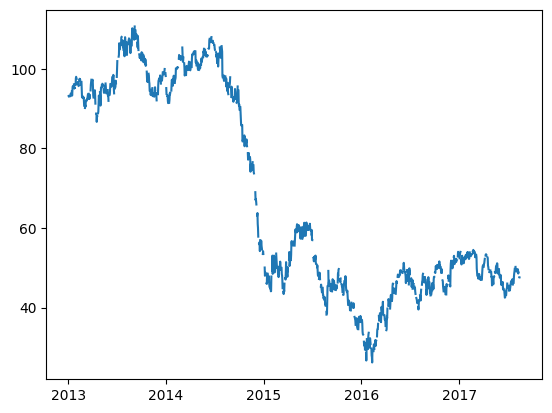

In [198]:
plt.plot(nu_data['date'], nu_data['dcoilwtico'], label='Original')

In [199]:
is_chronological = nu_data['date'].is_monotonic_increasing
print(is_chronological)

True


In [200]:
nu_data['dcoilwtico'] = nu_data['dcoilwtico'].interpolate(method='polynomial', order=2)


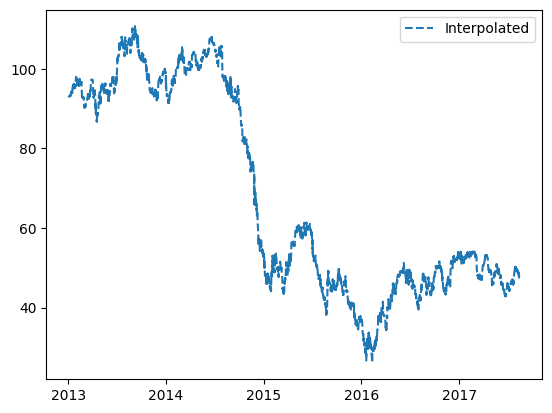

In [201]:
# Plot after interpolation
plt.plot(nu_data['date'], nu_data['dcoilwtico'], label='Interpolated', linestyle='--')
plt.legend()
plt.show()


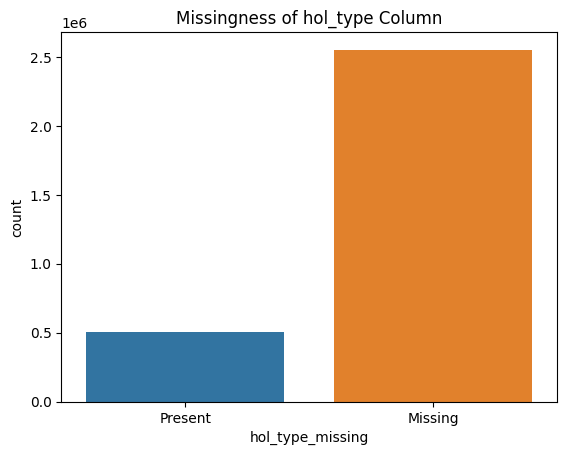

In [202]:
import pandas as pd
import seaborn as sns

# Create a column representing missingness
nu_data['hol_type_missing'] = nu_data['hol_type'].isnull().map({True: 'Missing', False: 'Present'})

# Plot
sns.countplot(data=nu_data, x='hol_type_missing')
plt.title('Missingness of hol_type Column')
plt.show()


## MULTIVARIATE AND UNIVARIATE ANALYSIS 

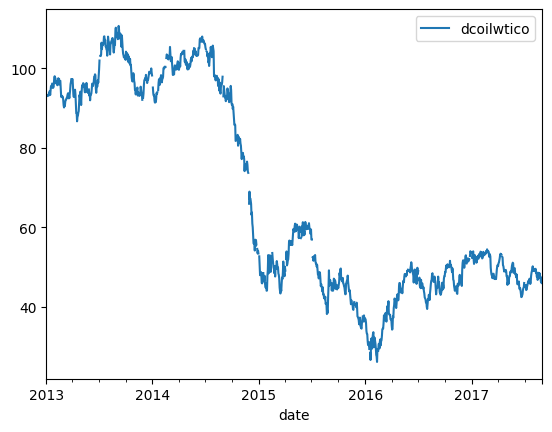

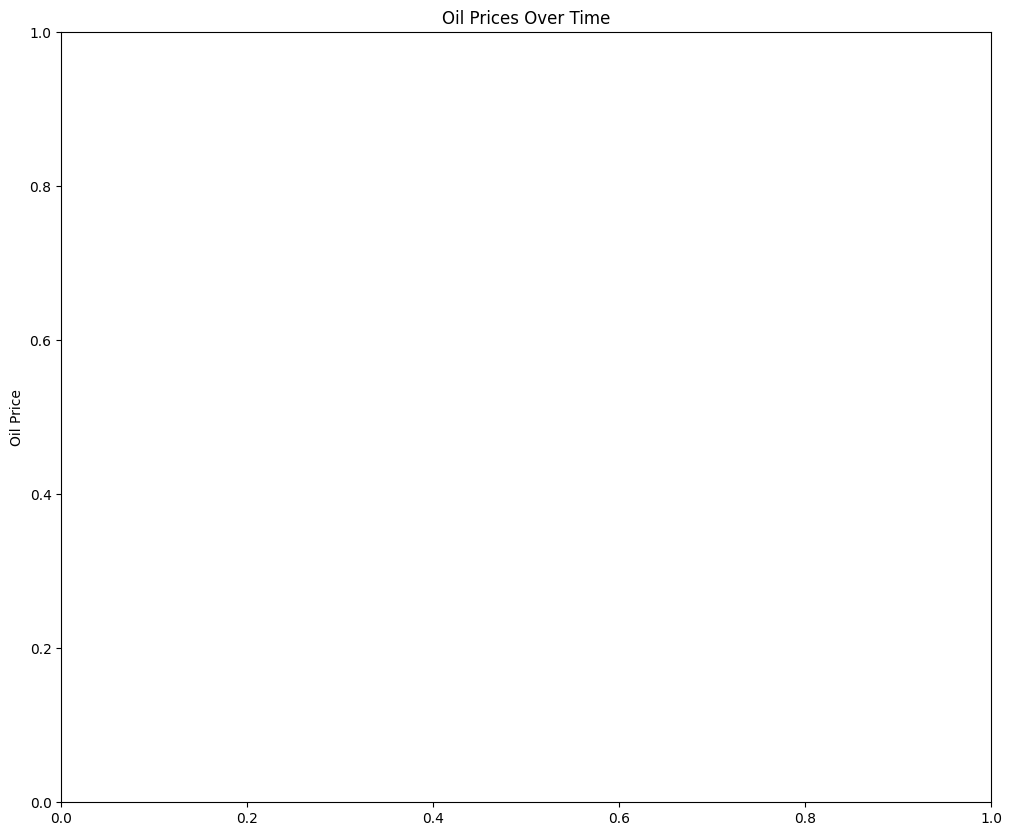

In [203]:
# Plot oil prices over time
df_oil.date = pd.to_datetime(df_oil.date)

df_oil.plot(x= 'date', y= 'dcoilwtico')
plt.figure(figsize=(12,10))
plt.title('Oil Prices Over Time')
plt.ylabel('Oil Price')
plt.show()

### Visualizing the seasonality of Sales at days, weekly, monthly, and quarterly, yearly level

NameError: name 'data_train' is not defined

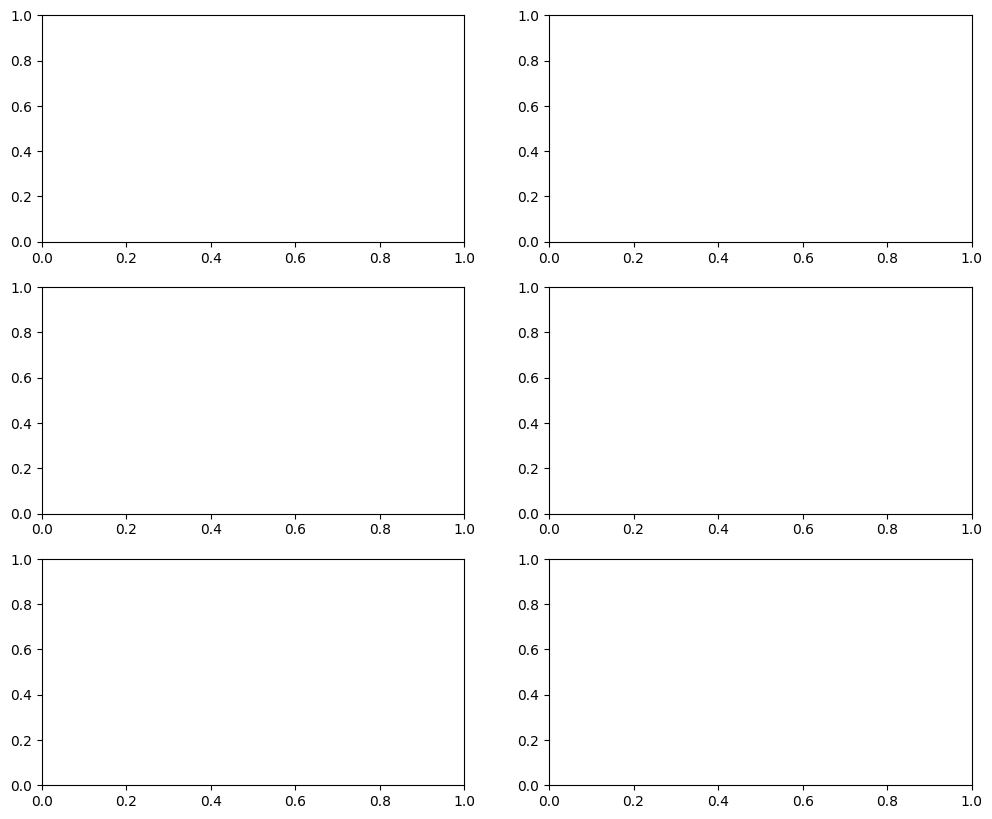

In [204]:
grouping_columns = ['year', 'quarter', 'month', 'day_of_week', 'day_of_year', 'day_of_month']

fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

for ind, column in enumerate(grouping_columns):
    grouped_data = data_train.groupby(column)['sales'].sum()
    grouped_data = pd.DataFrame(grouped_data).reset_index()

    sns.lineplot(data=grouped_data, x=column, y='sales', ax=axes[ind])

plt.tight_layout()
plt.show()

### Visualizing the seasonality of No. of promotions at days, weekly, monthly, and quarterly, yearly level

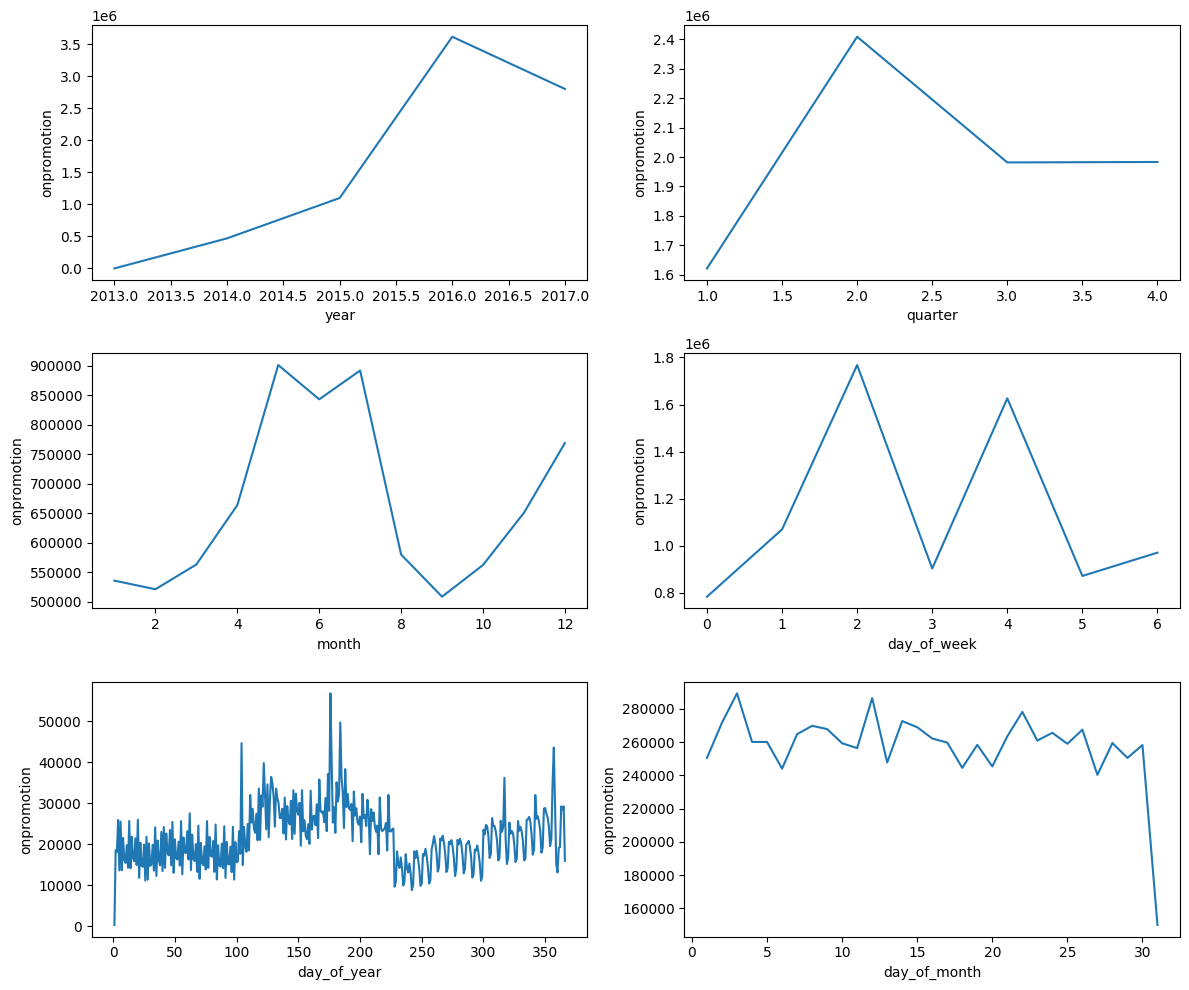

In [ ]:
grouping_columns = ['year', 'quarter', 'month', 'day_of_week', 'day_of_year', 'day_of_month']

fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

for ind, column in enumerate(grouping_columns):
    grouped_data = data_train.groupby(column)['onpromotion'].sum()
    grouped_data = pd.DataFrame(grouped_data).reset_index()

    sns.lineplot(data=grouped_data, x=column, y='onpromotion', ax=axes[ind])

plt.tight_layout()
plt.show()

# FEATURE ENGINEERING 

In [ ]:
# Creating lagged values on sales
data_ = data.copy().reset_index()

grouped_data = data_.groupby(['store_nbr', 'family'])

In [ ]:
alphas = [0.95, 0.8, 0.65, 0.5]
lags =[1,7,30]

for a in alphas:
    for i in lags:
        data_[f'sales_lag_{i}_alpha_{a}'] = np.log1p(grouped_data['sales'].transform(lambda x: x.shift(i).ewm(alpha=a, min_periods=1).mean()))

data_['sales_lag_7_alpha_0.5'].describe()

count    3.068604e+06
mean     3.002727e+00
std      2.665066e+00
min      0.000000e+00
25%      1.550843e-02
50%      2.562952e+00
75%      5.312741e+00
max      1.112374e+01
Name: sales_lag_7_alpha_0.5, dtype: float64

## MODELLING

In [ ]:
#import lightgbm as lgb
#hyper_params = {
    #'task': 'train',
    #'boosting_type': 'gbdt',
    #'objective': 'regression',
    #'metric': ['l1','l2'],
    #'learning_rate': 0.1,
    #'feature_fraction': 0.9,
    #'bagging_fraction': 0.7,
    #'bagging_freq': 10,
    #'verbose': 0,
    #"max_depth": 50,
    #"num_leaves": 128,
    #"max_bin": 512,
   # "num_iterations": 10000
}

#gbm = lgb.LGBMRegressor(**hyper_params)

#gbm.fit(X_train, y_train,
        #eval_set=[(X_val, y_val)],
        #eval_metric='l1')

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.128104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.

###Stationarity Check

ValueError: setting an array element with a sequence.

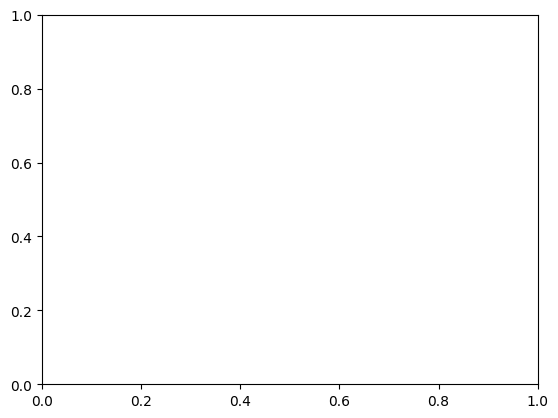

In [ ]:

def test_stationarity(timeseries):
    # Determining rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    # Plot rolling statistics:
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    # Perform Dickey-Fuller test:
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

test_stationarity(data['dcoilwtico'])

# MODELLING

### AutoRegressive model